In [1]:
#Question 1 --

def orderer(numbah):
    if numbah == False:
        numbah = str(111111)
    else:
        numbah = str(numbah)
        str_list = []
    
    for digit in numbah:
        str_list.append(digit)
        str_list.sort()
        str_list.reverse()
    ordered_list = ''.join(str_list)
    print(ordered_list)

In [2]:
orderer(8675309)


orderer()
# ^^^^^ I don't see how I can avoid an error message when the orderer function is run without an input value.  I know that the
# instructions ask me to use 111111 in cases where no input is given, but I can't test for that inside my function's
# definition because I get an error message on line 1.

9876530


TypeError: orderer() missing 1 required positional argument: 'numbah'

In [3]:
# Question 2 --

import pandas as pd

jeopardy = pd.read_csv("C:\\Users\jmortensen\Documents\CGDS\Data-Science-Assignments\course_material\week_05\JEOPARDY_CSV.csv")
print(pd.DataFrame(jeopardy.head()))
#part A
jeopardy.shape

   Show Number    Air Date      Round                         Category  Value  \
0         4680  12/31/2004  Jeopardy!                          HISTORY  $200    
1         4680  12/31/2004  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200    
2         4680  12/31/2004  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200    
3         4680  12/31/2004  Jeopardy!                 THE COMPANY LINE  $200    
4         4680  12/31/2004  Jeopardy!              EPITAPHS & TRIBUTES  $200    

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co...  John Adams  


(216930, 7)

In [4]:
# There are 216930 rows.  Each row represents a question from an episode of Jeopardy.

In [5]:
#part B

#Since I need to know the number of unique shows each year, I have to sort and slice the jeopardy dataframe to count those.

# Dropping duplicates by Show Number
no_dup_shows=jeopardy.drop_duplicates(subset ="Show Number")

# Create a list of only the years from the "Air Date" column
Year = []
for yr in no_dup_shows[" Air Date"]:
    year = yr[-4:]
    Year.append(year)
    
# Add the "Year" list as a new column in the jeopardy dataframe
Year_Series=pd.Series(Year, index=no_dup_shows.index)
no_dup_shows = pd.concat([no_dup_shows, Year_Series.rename("Year")], axis=1)

#Sort according to year and show number
no_dup_sorted=no_dup_shows.sort_values(["Year","Show Number"])

#Count the number of occurrences for each year in "Year" column (which is equal to number of shows in each year)
num_of_shows_each_yr=no_dup_sorted["Year"].value_counts()
num_of_shows_each_yr_sorted=num_of_shows_each_yr.sort_index()
print(num_of_shows_each_yr_sorted)

1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Year, dtype: int64


In [6]:
#part C 

# On average, how many questions are created for each episode of Jeopardy?

In [7]:
#part D

1       48
2       50
3       51
4       53
5       54
        ..
6295    58
6296    61
6297    59
6298    61
6300    30
Name: Show Number, Length: 3640, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

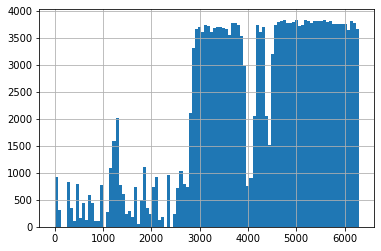

In [8]:
# Question 3 --

import matplotlib.pyplot as plt

year_lst=[]
for i in jeopardy[" Air Date"]:
    yr = i[-4:]
    year_lst.append(yr)

# Add "year_list" as a new column in the jeopardy dataframe
jeopardy["Year"]=year_lst
num_of_questions_per_show=jeopardy["Show Number"].value_counts()

num_of_questions_per_show_sorted=num_of_questions_per_show.sort_index()
print(num_of_questions_per_show_sorted)

jeopardy["Show Number"].hist(bins = 100)
plt.show

#This graph has no purpose, tbh.  With so few columns of numeric data, there aren't a lot of interesting options 
#for graphing.  Sorry.  I'm not even sure what these axes mean on the graph.  Please enlighten me if you have a minute
#to do so.